# Praca domowa 4 
### Mateusz Krzyziński, grupa 2


Zadanie dotyczy algorytmu Support Vector Machine omawianego na zajęciach i opisanego w [artykule]( http://pyml.sourceforge.net/doc/howto.pdf). 

Dopasujemy SVM do dwóch zbiorów danych:
- apartments z pakietu DALEX,
- Mobile Price Classification (wybranego przeze mnie i dostępnego na [kaggle'u](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). 

#### Import pakietów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Wczytanie danych

In [2]:
from dalex.datasets import load_apartments
apartments_data = load_apartments()
mobile_data = pd.read_csv("mobile.csv")

W zbiorze dotyczącym mieszkań mamy 1000 obserwacji i 6 zmiennych: target - m2_price (cena za metr kwadratowy mieszkania) i 5 zmiennych objaśniających - 4 numeryczne i 1 kategoryczna (dzielnica). 

In [3]:
apartments_data

,m2_price,construction_year,surface,floor,no_rooms,district
1,5897,1953,25,3,1,Srodmiescie
2,1818,1992,143,9,5,Bielany
3,3643,1937,56,1,2,Praga
4,3517,1995,93,7,3,Ochota
5,3013,1992,144,6,5,Mokotow
...,...,...,...,...,...,...
996,6355,1921,44,2,2,Srodmiescie
997,3422,1921,48,10,2,Bemowo
998,3098,1980,85,3,3,Bemowo
999,4192,1942,36,7,1,Zoliborz


Nie ma też braków zmiennych. Zatem nie musimy się martwić o imputacje. 

In [4]:
apartments_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   m2_price           1000 non-null   int64 
 1   construction_year  1000 non-null   int64 
 2   surface            1000 non-null   int64 
 3   floor              1000 non-null   int64 
 4   no_rooms           1000 non-null   int64 
 5   district           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 54.7+ KB


In [5]:
from sklearn.model_selection import train_test_split

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    apartments_data.drop("m2_price", axis=1), 
    apartments_data["m2_price"], 
    test_size=0.3, random_state=42)

<hr>

Zbiór danych dotyczących cen telefonów jest większy - zawiera 2000 obserwacji 21 zmiennych. Zmienna celu to price_range określająca przedział cenowy danego telefonu. Pozostałe 20 zmiennych opisuje atrybuty telefonu - wszystkie zmienne mają format numeryczny, ale część jest tak naprawdę zmiennymi binarnymi określającymi, czy dana cecha występuje, czy nie w danym smartfonie. 

In [6]:
mobile_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


W tym zbiorze również nie ma brakujących wartości. 

In [7]:
mobile_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    mobile_data.drop("price_range", axis=1), 
    mobile_data["price_range"], 
    test_size=0.3, random_state=42) 

### 1.  Dopasowanie SVM do obu zbiorów danych

Pierwsze zadanie jest zadaniem regresji wobec tego zastosujemy klasę SVR i miary odpowiednie dla regresji. 
Ponadto zbiór danych zawiera jedną zmienną kategoryczną, zatem musimy ją zakodować - w tym celu użyję one hot encodingu. 

In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
a_preprocessor = ColumnTransformer([('one hot encoding', OneHotEncoder(), ["district"])], remainder = "passthrough")

svr_model = Pipeline(steps=[('preprocessing', a_preprocessor),  
                            ('svr', SVR())])  

In [11]:
svr_model.fit(X_train_a, y_train_a)
y_hat_a = svr_model.predict(X_test_a)
y_hat_a_train = svr_model.predict(X_train_a)

In [12]:
print(f"""Wyniki pierwszego modelu dla zbioru apartments na zbiorze treningowym:
RMSE: {mean_squared_error(y_train_a, y_hat_a_train, squared=False):.4f}
R^2 score: {r2_score(y_train_a, y_hat_a_train):.4f}""")

print(f"""Wyniki pierwszego modelu dla zbioru apartments na zbiorze testowym:
RMSE: {mean_squared_error(y_test_a, y_hat_a, squared=False):.4f}
R^2 score: {r2_score(y_test_a, y_hat_a):.4f}""")

Wyniki pierwszego modelu dla zbioru apartments na zbiorze treningowym:
RMSE: 909.5143
R^2 score: -0.0100
Wyniki pierwszego modelu dla zbioru apartments na zbiorze testowym:
RMSE: 921.4747
R^2 score: -0.0316


Wynik $R^2$ nie napawa optymizmem, przy czym wyniki na zbiorze treningowym pozwalają nam stwierdzić, że nie jest to kwestia przeuczenia. Natomiast sama w sobie miara RMSE nie mówi nam zbyt dużo - musimy ją odnieść do wartości, jakie przyjmuje target. Niestety okazuje się, że rzeczywiście jest to dość duży błąd. 

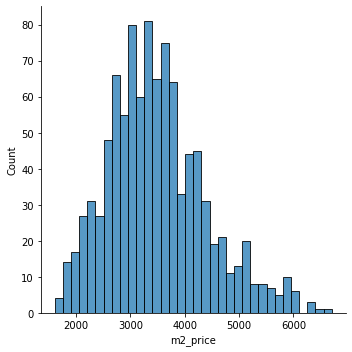

In [13]:
sns.displot(apartments_data, x="m2_price", binwidth=150)
plt.show()

Zadanie dotyczące drugiego zbioru jest zadaniem klasyfikacji wobec tego zastosujemy klasę SVC i miary odpowiednie dla klasyfikacji. Tym razem nie będziemy wykonywać żadnego dodatkowego preprocessingu - zmienne "kategoryczne" są już zakodowane w postaci binarnej. 

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [15]:
svc_model = SVC() 

In [16]:
svc_model.fit(X_train_m, y_train_m)
y_hat_m = svc_model.predict(X_test_m)
y_hat_m_train = svc_model.predict(X_train_m)

In [17]:
print(f"""Wyniki pierwszego modelu dla zbioru mobile price na zbiorze treningowym:
{classification_report(y_train_m, y_hat_m_train, digits=4)}""")

print(f"""Wyniki pierwszego modelu dla zbioru mobile price na zbiorze testowym:
{classification_report(y_test_m, y_hat_m, digits=4)}""")

Wyniki pierwszego modelu dla zbioru mobile price na zbiorze treningowym:
              precision    recall  f1-score   support

           0     0.9745    0.9857    0.9801       349
           1     0.9339    0.9576    0.9456       354
           2     0.9550    0.9034    0.9285       352
           3     0.9573    0.9739    0.9655       345

    accuracy                         0.9550      1400
   macro avg     0.9552    0.9552    0.9549      1400
weighted avg     0.9551    0.9550    0.9548      1400

Wyniki pierwszego modelu dla zbioru mobile price na zbiorze testowym:
              precision    recall  f1-score   support

           0     0.9932    0.9669    0.9799       151
           1     0.9114    0.9863    0.9474       146
           2     0.9437    0.9054    0.9241       148
           3     0.9673    0.9548    0.9610       155

    accuracy                         0.9533       600
   macro avg     0.9539    0.9534    0.9531       600
weighted avg     0.9544    0.9533    0.953

Widać, że model działa już bardzo dobrze.

### 2. Słuszność skalowania danych

We wspomnianym we wstępie i podlinkowanym w treści pracy domowej artykule dotyczącym SVM znajdziemy rozdział poświęcony normalizacji zmiennych. Autorzy wskazują, że w wielu wypadkach, gdy zmienne mają istotnie różne zakresy wartości, korzystnym jest przeskalowanie do wspólnego zakresu, na przykład poprzed standardyzację. Jednak wspominają również, że standardyzacja nie jest właściwa, jeśli dane są rzadkie, gdyż wówczas proces ten przekształca dane w niewłaściwy sposób. 


W przypadku obu ramek danych zmienne numeryczne nie są rzadkie, zatem będziemy mogli poddać wszystkie standardyzacji i wytrenować na takich zmiennych modele.

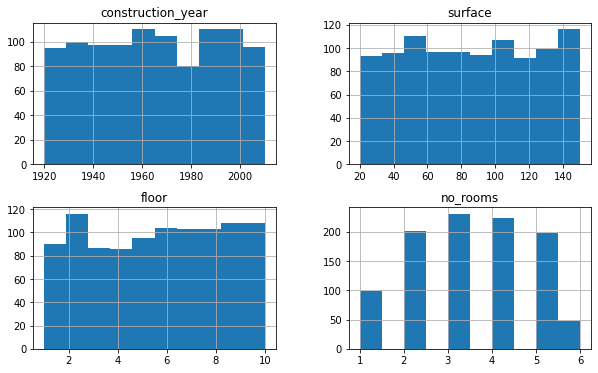

In [18]:
apartments_data.drop("m2_price", axis=1).hist(figsize=(10, 6))
plt.show()

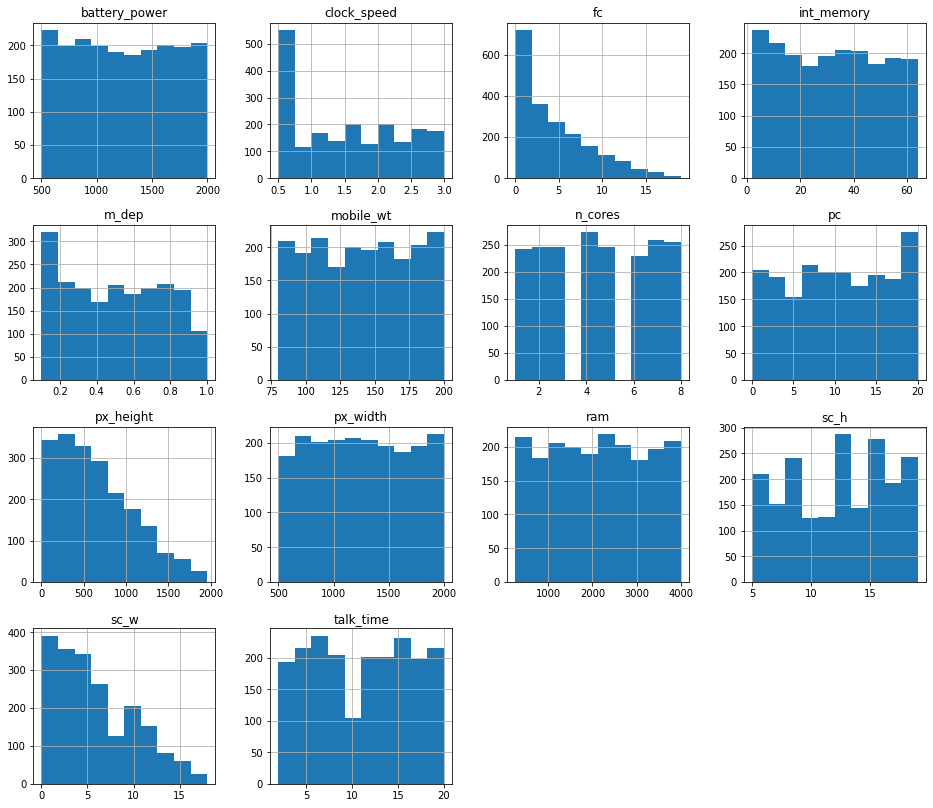

In [19]:
#bez kolumn binarnych i targetu
mobile_data.drop(["price_range", "blue", "dual_sim", "four_g", 
                  "three_g", "touch_screen", "wifi"], axis=1).hist(figsize=(16, 14))
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
a_preprocessor_prim = ColumnTransformer([('one hot encoding', OneHotEncoder(), ["district"]), 
                                        ('standardization', StandardScaler(), ['construction_year', 'surface', 'floor', 
                                                                               'no_rooms'])],
                                       remainder = "passthrough")

svr_model_with_scaling = Pipeline(steps=[('preprocessing', a_preprocessor_prim),  
                            ('svr', SVR())])  

In [22]:
svr_model_with_scaling.fit(X_train_a, y_train_a)
y_hat_a_prim = svr_model_with_scaling.predict(X_test_a)
y_hat_a_train_prim = svr_model_with_scaling.predict(X_train_a)

In [23]:
print(f"""Wyniki modelu ze skalowaniem zmiennych dla zbioru apartments na zbiorze treningowym:
RMSE: {mean_squared_error(y_train_a, y_hat_a_train_prim, squared=False):.4f}
R^2 score: {r2_score(y_train_a, y_hat_a_train_prim):.4f}""")

print(f"""Wyniki modelu ze skalowaniem zmiennych dla zbioru apartments na zbiorze testowym:
RMSE: {mean_squared_error(y_test_a, y_hat_a_prim, squared=False):.4f}
R^2 score: {r2_score(y_test_a, y_hat_a_prim):.4f}""")

Wyniki modelu ze skalowaniem zmiennych dla zbioru apartments na zbiorze treningowym:
RMSE: 886.8111
R^2 score: 0.0398
Wyniki modelu ze skalowaniem zmiennych dla zbioru apartments na zbiorze testowym:
RMSE: 900.1320
R^2 score: 0.0157


Po przeskalowaniu zmiennych udało się osiągnąć nieco lepsze rezultaty w porównaniu do pierwotnego modelu.

In [24]:
m_preprocessor_prim = ColumnTransformer([('standardization', StandardScaler(), ['battery_power', 'clock_speed', 
                                                                               'fc', 'int_memory', 'm_dep',
                                                                               'mobile_wt', 'n_cores', 'pc', 
                                                                               'px_height', 'px_width', 'ram', 
                                                                               'sc_h', 'sc_w', 'talk_time'])],
                                       remainder = "passthrough")

svc_model_with_scaling = Pipeline(steps=[('preprocessing', m_preprocessor_prim),  
                            ('svc', SVC())])  

In [25]:
svc_model_with_scaling.fit(X_train_m, y_train_m)
y_hat_m_prim = svc_model_with_scaling.predict(X_test_m)
y_hat_m_train_prim = svc_model_with_scaling.predict(X_train_m)

In [26]:
print(f"""Wyniki modelu ze skalowaniem zmiennych dla zbioru mobile price na zbiorze treningowym:
{classification_report(y_train_m, y_hat_m_train_prim, digits=4)}""")

print(f"""Wyniki modelu ze skalowaniem zmiennych dla zbioru mobile price na zbiorze testowym:
{classification_report(y_test_m, y_hat_m_prim, digits=4)}""")

Wyniki modelu ze skalowaniem zmiennych dla zbioru mobile price na zbiorze treningowym:
              precision    recall  f1-score   support

           0     0.9971    0.9914    0.9943       349
           1     0.9776    0.9859    0.9817       354
           2     0.9802    0.9830    0.9816       352
           3     0.9971    0.9913    0.9942       345

    accuracy                         0.9879      1400
   macro avg     0.9880    0.9879    0.9879      1400
weighted avg     0.9879    0.9879    0.9879      1400

Wyniki modelu ze skalowaniem zmiennych dla zbioru mobile price na zbiorze testowym:
              precision    recall  f1-score   support

           0     0.9456    0.9205    0.9329       151
           1     0.8217    0.8836    0.8515       146
           2     0.8571    0.8514    0.8542       148
           3     0.9597    0.9226    0.9408       155

    accuracy                         0.8950       600
   macro avg     0.8960    0.8945    0.8948       600
weighted avg  

Po przeskalowaniu zmiennych model osiągnął lepsze rezultaty na zbiorze treningowym, jednak doszło do overfittingu i wyniki na zbiorze testowym są gorsze. Sposobem zaradzenia na ten problem może być regularyzacja modelu poprzez dobranie odpowiednich hiperparametrów. Tym zajmiemy się w punkcie trzecim. 

### 3. Optymalizacja hiperparametrów poprzez random search

W tym punkcie spróbujemy zoptymalizować hiperparametry modeli SVM przy użyciu poszukiwania losowego po przestrzeni parametrów. Będziemy optymalizować parametry `C` i `gamma` w modelach SVM z jądrem gaussowskim (w sklearn nazwanym rbf - od radial basic function) oraz dodatkowo parametr `degree` w przypadku jądra wielomianowego. Dostrajanie przeprowadzimy oddzielnie dla jądra wielomianowego ze względu na to, że w przypadku modeli z innym jądrem parametr stopnia jest ignorowany. 


Warto przed ich optymalizacją wiedzieć, co oznaczają poszczególne parametry. 
- Parametr `gamma` definiuje "jak daleko sięga" wpływ poszczególnych obserwacji uznanych przez model jako wektory nośne (małe wartości oznaczają daleko, duże wartości - blisko).
- Parametr `C` jest parametrem regularyzacyjnym modelu, który wpływa na kompromis pomiędzy wariancją a obciążeniem. Mniejsze wartości odpowiadają większej regularyzacji - prostszej funkcji decyzyjnej. 
- Parametr `degree` oznacza stopień jądra wielomianowego. 

#### Optymalizacja hiperparametrów dla pierwszego zbioru

In [27]:
from sklearn.model_selection import RandomizedSearchCV

svr_model_a_31 = Pipeline(steps=[('preprocessing', a_preprocessor_prim),   #with scaling
                            ('svr', SVR(kernel = 'rbf'))])  

param_grid_a_31 = {'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}

svr_model_a_31_tuned = RandomizedSearchCV(svr_model_a_31, param_grid_a_31, 
                                          cv = 5, 
                                          scoring = ['neg_root_mean_squared_error', 'r2'], 
                                          refit = 'neg_root_mean_squared_error',
                                          n_iter = 30,
                                          random_state = 42)

svr_model_a_31_tuned.fit(X_train_a, y_train_a)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoding',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop=None,
                       

In [28]:
svr_model_a_31_tuned.best_params_

{'svr__gamma': 0.01, 'svr__C': 10000}

In [29]:
y_hat_a_31_train = svr_model_a_31_tuned.predict(X_train_a)
y_hat_a_31 = svr_model_a_31_tuned.predict(X_test_a)

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór apartments treningowy)
RMSE: {mean_squared_error(y_train_a, y_hat_a_31_train, squared=False):.4f}
R^2 score: {r2_score(y_train_a, y_hat_a_31_train):.4f}""")

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór apartments testowy)
RMSE: {mean_squared_error(y_test_a, y_hat_a_31, squared=False):.4f}
R^2 score: {r2_score(y_test_a, y_hat_a_31):.4f}""")

Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór apartments treningowy)
RMSE: 141.6187
R^2 score: 0.9755
Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór apartments testowy)
RMSE: 145.3897
R^2 score: 0.9743


Widać, że wyniki są już znacznie lepsze. Sprawdzimy jeszcze, co by się stało, gdybyśmy nie przeskalowali zmiennych.

In [30]:
svr_model_a_31_b = Pipeline(steps=[('preprocessing', a_preprocessor),   #without scaling
                            ('svr', SVR(kernel = 'rbf'))])  

svr_model_a_31_b_tuned = RandomizedSearchCV(svr_model_a_31_b, param_grid_a_31, 
                                          cv = 5, 
                                          scoring = ['neg_root_mean_squared_error', 'r2'], 
                                          refit = 'neg_root_mean_squared_error',
                                          n_iter = 30,
                                          random_state = 42)

svr_model_a_31_b_tuned.fit(X_train_a, y_train_a)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoding',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop=None,
                       

In [31]:
y_hat_a_31_b_train = svr_model_a_31_b_tuned.predict(X_train_a)
y_hat_a_31_b = svr_model_a_31_b_tuned.predict(X_test_a)

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór apartments treningowy)
RMSE: {mean_squared_error(y_train_a, y_hat_a_31_b_train, squared=False):.4f}
R^2 score: {r2_score(y_train_a, y_hat_a_31_b_train):.4f}""")

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór apartments testowy)
RMSE: {mean_squared_error(y_test_a, y_hat_a_31_b, squared=False):.4f}
R^2 score: {r2_score(y_test_a, y_hat_a_31_b):.4f}""")

Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór apartments treningowy)
RMSE: 715.6939
R^2 score: 0.3746
Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór apartments testowy)
RMSE: 806.9720
R^2 score: 0.2089


Jak widać, bez skalowania zmiennych nie jesteśmy w stanie osiągnąć tak dobrych wyników nawet z dostrajaniem hiperparametrów.


Teraz spróbujemy również dostroić model oparty o jądro wielomianowe. 

In [32]:
svr_model_a_32 = Pipeline(steps=[('preprocessing', a_preprocessor_prim),   #with scaling
                            ('svr', SVR(kernel = 'poly'))])  

param_grid_a_32 = {'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                   'svr__degree': [2, 3, 4, 5, 6, 7, 8]}

svr_model_a_32_tuned = RandomizedSearchCV(svr_model_a_32, param_grid_a_32, 
                                          cv = 5, 
                                          scoring = ['neg_root_mean_squared_error', 'r2'], 
                                          refit = 'neg_root_mean_squared_error',
                                          n_iter = 40,
                                          random_state = 42)

svr_model_a_32_tuned.fit(X_train_a, y_train_a)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoding',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop=None,
                       

In [33]:
svr_model_a_32_tuned.best_params_

{'svr__gamma': 0.1, 'svr__degree': 3, 'svr__C': 1000}

In [34]:
y_hat_a_32_train = svr_model_a_32_tuned.predict(X_train_a)
y_hat_a_32 = svr_model_a_32_tuned.predict(X_test_a)

print(f"""Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór apartments treningowy)
RMSE: {mean_squared_error(y_train_a, y_hat_a_32_train, squared=False):.4f}
R^2 score: {r2_score(y_train_a, y_hat_a_32_train):.4f}""")

print(f"""Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór apartments testowy)
RMSE: {mean_squared_error(y_test_a, y_hat_a_32, squared=False):.4f}
R^2 score: {r2_score(y_test_a, y_hat_a_32):.4f}""")

Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór apartments treningowy)
RMSE: 444.8104
R^2 score: 0.7584
Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór apartments testowy)
RMSE: 504.8480
R^2 score: 0.6904


Jak widać, wynik jest również znacznie lepszy niż w przypadku niedostrojonych modeli, ale gorszy niż dla poprzedniego dostrojonego modelu (z jądrem rbf). 

#### Optymalizacja hiperparametrów dla drugiego zbioru

In [35]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [36]:
svc_model_m_31 = Pipeline(steps=[('preprocessing', m_preprocessor_prim),   #with scaling
                            ('svc', SVC(kernel='rbf'))])  

param_grid_m_31 = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}


svc_model_m_31_tuned = RandomizedSearchCV(svc_model_m_31, param_grid_m_31, 
                                          cv = 5, 
                                          scoring = scoring,
                                          refit = 'accuracy',
                                          n_iter = 30,
                                          random_state = 42)

svc_model_m_31_tuned.fit(X_train_m, y_train_m)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('standardization',
                                                                               StandardScaler(copy=True,
                                                                                              with_mean=True,
                                                                                              with_std=True),
                                                                               

In [37]:
svc_model_m_31_tuned.best_params_

{'svc__gamma': 0.001, 'svc__C': 100}

In [38]:
y_hat_m_31_train = svc_model_m_31_tuned.predict(X_train_m)
y_hat_m_31 = svc_model_m_31_tuned.predict(X_test_m)

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór mobile treningowy):
{classification_report(y_train_m, y_hat_m_31_train, digits=4)}""")

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór mobile testowy):
{classification_report(y_test_m, y_hat_m_31, digits=4)}""")

Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór mobile treningowy):
              precision    recall  f1-score   support

           0     0.9771    0.9799    0.9785       349
           1     0.9630    0.9548    0.9589       354
           2     0.9659    0.9659    0.9659       352
           3     0.9827    0.9884    0.9855       345

    accuracy                         0.9721      1400
   macro avg     0.9722    0.9723    0.9722      1400
weighted avg     0.9721    0.9721    0.9721      1400

Wyniki dostrojonego modelu z jądrem gaussowskim i skalowaniem zmiennych (zbiór mobile testowy):
              precision    recall  f1-score   support

           0     0.9730    0.9536    0.9632       151
           1     0.9211    0.9589    0.9396       146
           2     0.9786    0.9257    0.9514       148
           3     0.9625    0.9935    0.9778       155

    accuracy                         0.9583       600
   macro avg     0.9588    0.9579    0.9580 

Widać, że wyniki są już lepsze i nie dochodzi do takiego overfittingu jak wcześniej. Sprawdzimy jeszcze, co by się stało, gdybyśmy nie przeskalowali zmiennych.

In [39]:
svc_model_m_31_b = Pipeline([('svc', SVC(kernel='rbf'))])  

svc_model_m_31_b_tuned = RandomizedSearchCV(svc_model_m_31_b, param_grid_m_31, 
                                          cv = 5, 
                                          scoring = scoring,
                                          refit = 'accuracy',
                                          n_iter = 30,
                                          random_state = 42)

svc_model_m_31_b_tuned.fit(X_train_m, y_train_m)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('svc',
                                              SVC(C=1.0, break_ties=False,
                                                  cache_size=200,
                                                  class_weight=None, coef0=0.0,
                                                  decision_function_shape='ovr',
                                                  degree=3, gamma='scale',
                                                  kernel='rbf', max_iter=-1,
                                                  probability=False,
                                                  random_state=None,
                                                  shrinking=True, tol=0.001,
                                                  verbose=False))],
                                      verbose=False),
                   iid='deprecated', n_iter=...
               

In [40]:
y_hat_m_31_b_train = svc_model_m_31_b_tuned.predict(X_train_m)
y_hat_m_31_b = svc_model_m_31_b_tuned.predict(X_test_m)

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór mobile treningowy):
{classification_report(y_train_m, y_hat_m_31_b_train, digits=4)}""")

print(f"""Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór mobile testowy):
{classification_report(y_test_m, y_hat_m_31_b, digits=4)}""")

Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór mobile treningowy):
              precision    recall  f1-score   support

           0     0.9829    0.9885    0.9857       349
           1     0.9689    0.9689    0.9689       354
           2     0.9662    0.9744    0.9703       352
           3     0.9941    0.9797    0.9869       345

    accuracy                         0.9779      1400
   macro avg     0.9780    0.9779    0.9779      1400
weighted avg     0.9779    0.9779    0.9779      1400

Wyniki dostrojonego modelu z jądrem gaussowskim i bez skalowania zmiennych (zbiór mobile testowy):
              precision    recall  f1-score   support

           0     1.0000    0.9603    0.9797       151
           1     0.9241    1.0000    0.9605       146
           2     0.9724    0.9527    0.9625       148
           3     0.9934    0.9742    0.9837       155

    accuracy                         0.9717       600
   macro avg     0.9725    0.9718    0

W wypadku tego zbioru nieprzeskalowanie zmiennych wpływa na poprawę jakości modelu. 

Spróbujemy jeszcze dostroić model oparty o jądro wielomianowe. 

In [41]:
svc_model_m_32 = Pipeline(steps=[('preprocessing', m_preprocessor_prim),   #with scaling
                            ('svc', SVC(kernel='poly'))])  

param_grid_m_32 = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                   'svc__degree': [2, 3, 4, 5, 6, 7, 8]}


svc_model_m_32_tuned = RandomizedSearchCV(svc_model_m_32, param_grid_m_32, 
                                          cv = 5, 
                                          scoring = scoring,
                                          refit = 'accuracy',
                                          n_iter = 40,
                                          random_state = 42)

svc_model_m_32_tuned.fit(X_train_m, y_train_m)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('standardization',
                                                                               StandardScaler(copy=True,
                                                                                              with_mean=True,
                                                                                              with_std=True),
                                                                               

In [42]:
svc_model_m_32_tuned.best_params_

{'svc__gamma': 0.1, 'svc__degree': 2, 'svc__C': 1}

In [43]:
y_hat_m_32_train = svc_model_m_32_tuned.predict(X_train_m)
y_hat_m_32 = svc_model_m_32_tuned.predict(X_test_m)

print(f"""Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór mobile treningowy):
{classification_report(y_train_m, y_hat_m_32_train, digits=4)}""")

print(f"""Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór mobile testowy):
{classification_report(y_test_m, y_hat_m_32, digits=4)}""")

Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór mobile treningowy):
              precision    recall  f1-score   support

           0     0.9882    0.9599    0.9738       349
           1     0.9209    0.9209    0.9209       354
           2     0.8770    0.9517    0.9128       352
           3     0.9846    0.9275    0.9552       345

    accuracy                         0.9400      1400
   macro avg     0.9427    0.9400    0.9407      1400
weighted avg     0.9423    0.9400    0.9405      1400

Wyniki dostrojonego modelu z jądrem wielomianowym i skalowaniem zmiennych (zbiór mobile testowy):
              precision    recall  f1-score   support

           0     0.8897    0.8543    0.8716       151
           1     0.7006    0.7534    0.7261       146
           2     0.7239    0.7973    0.7588       148
           3     0.9630    0.8387    0.8966       155

    accuracy                         0.8117       600
   macro avg     0.8193    0.8109    0.8

Niestety w tym przypadku jądro wielomianowe nie okazało się być dobrym rozwiązaniem. 

### Podsumowanie osiągniętych wyników

1. Zbiór danych apartments

In [44]:
RMSE = []
R2 = []
for y_hat in [y_hat_a, y_hat_a_prim, y_hat_a_31, y_hat_a_31_b, y_hat_a_32]:
    RMSE.append(mean_squared_error(y_test_a, y_hat, squared=False))
    R2.append(r2_score(y_test_a, y_hat))

pd.DataFrame(list(zip(RMSE, R2)), columns =['RMSE', 'R2'], 
             index = ["SVR default", "SVR w/ scaling", 
                      "SVR w/ scaling tuned (rbf kernel)", 
                      "SVR w/o scaling tuned (rbf kernel)",
                      "SVR w/ scaling tuned (poly kernel)"] )

,RMSE,R2
SVR default,921.474677,-0.031575
SVR w/ scaling,900.132022,0.015657
SVR w/ scaling tuned (rbf kernel),145.389722,0.974320
SVR w/o scaling tuned (rbf kernel),806.971957,0.208864
SVR w/ scaling tuned (poly kernel),504.847954,0.690361


W przypadku tego zbioru danych skalowanie rzeczywiście pomogło w osiągnięciu lepszego wyniku, ale dopiero po dostrojeniu hiperparametrów rzeczywiście otrzymujemy zadowalający wynik (różnica jest naprawdę znacząca). 

2. Zbiór danych mobile

In [45]:
accuracy = [] 
precision = [] 
recall = []
f1 = []

for y_hat in [y_hat_m, y_hat_m_prim, y_hat_m_31, y_hat_m_31_b, y_hat_m_32]:
    accuracy.append(accuracy_score(y_test_m, y_hat))
    precision.append(precision_score(y_test_m, y_hat, average = 'macro'))
    recall.append(recall_score(y_test_m, y_hat, average = 'macro'))
    f1.append(f1_score(y_test_m, y_hat, average = 'weighted'))

pd.DataFrame(list(zip(accuracy, precision, recall, f1)), columns =['accuracy', 'precision', 'recall', 'f1'], 
             index = ["SVC default", "SVC w/ scaling", 
                      "SVC w/ scaling tuned (rbf kernel)", 
                      "SVC w/o scaling tuned (rbf kernel)",
                      "SVC w/ scaling tuned (poly kernel)"] )

,accuracy,precision,recall,f1
SVC default,0.953333,0.953893,0.953358,0.953348
SVC w/ scaling,0.895000,0.896027,0.894506,0.895720
SVC w/ scaling tuned (rbf kernel),0.958333,0.958774,0.957943,0.958312
SVC w/o scaling tuned (rbf kernel),0.971667,0.972471,0.971790,0.971825
SVC w/ scaling tuned (poly kernel),0.811667,0.819295,0.810934,0.814826


W przypadku tego zbioru danych samo skalowanie bez odpowiedniej regularyzacji i dostrojenia hiperparametrów wpłynęło na przeuczenie się modelu i pogorszenie jakości predykcji na zbiorze testowym. 
Natomiast dostrojony model rzeczywiście skorzystał na skalowaniu zmiennych, natomiast najlepszy wynik osiągnął dostrojony model bez skalowania.

### Wnioski:
- wpływ skalowania zmiennych na poprawę jakości modelu typu SVM może być znaczący (przykład pierwszego zbioru), ale zależy to również od specyfiki zbioru danych,
- równie ważne jest dobranie odpowiednich hiperparametrów modelu, wówczas możemy odnieść większą korzyść ze skalowania.